# Import

In [1]:
# from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
from pyzbar import pyzbar
import cv2
import pytesseract
from PIL import Image
import os
import numpy as np
import pandas as pd
import imutils
import pdf2image
from dbr import DynamsoftBarcodeReader
import re
from matplotlib import pyplot as plt
from skimage.measure import compare_ssim
import imutils
import statistics
from scipy import stats
import random
from difflib import SequenceMatcher
from IPython.display import display, Markdown, Latex
from google.cloud import vision
import io
from google.oauth2 import service_account

%matplotlib inline

# FILES

In [2]:
os.chdir('/Users/kunal/Documents/VdartWorking/realFake/RunningPresent/')

## TESTING IMAGE

In [3]:
MAINIMAGEFILEPNG = '/Users/kunal/Documents/VdartWorking/NEWDOCUMENTS/Working/Cut10/Real/Mayuri S. H1B/Mayuri S. H1B.jpg'
MAINIMAGEFILEJPG = MAINIMAGEFILEPNG
MAINPDFFILE = '/Users/kunal/Documents/VdartWorking/NEWDOCUMENTS/Working/Cut10/Real/Mayuri S. H1B/Mayuri S. H1B.pdf'

In [4]:
IMAGE1NAME = MAINIMAGEFILEPNG
img1 = cv2.imread(IMAGE1NAME)
x11, y11, z11 = img1.shape
img1 = cv2.resize(img1, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)

## REAL Image

In [5]:
COMPAREIMAGEFILEPNG = '/Users/kunal/Documents/VdartWorking/realFake/Document.jpg'
#COMPAREFILEPDF = '/Users/kunal/Documents/VdartWorking/SampleCopies/GenuineCopies/H1B-Anil Gade.pdf'

In [6]:
#REAL IMAGE
IMAGE2NAME = COMPAREIMAGEFILEPNG
img2 = cv2.imread(IMAGE2NAME) 
x2, y2, z2 = img2.shape
img2 = cv2.resize(img2, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)

# Display the Image

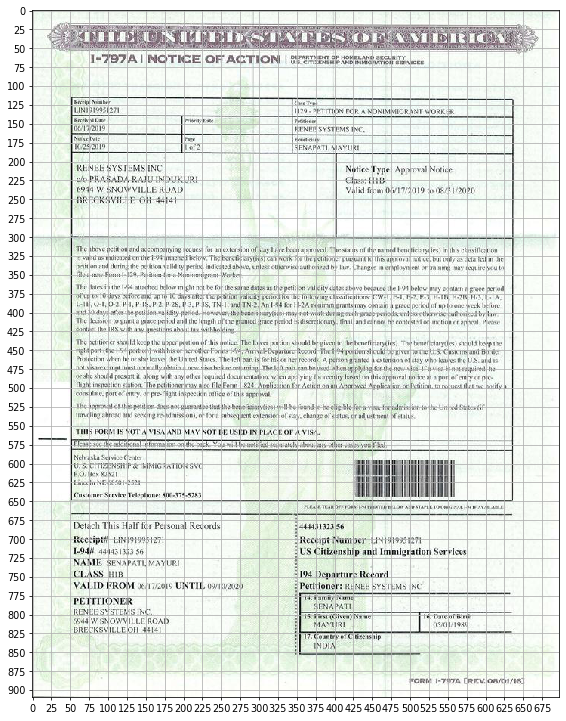

In [7]:
file = MAINIMAGEFILEPNG
image = Image.open(file)
imageCV = cv2.imread(file)
my_dpi=70. # size of the axis (the text size)
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)
myxInterval=25. #the interval for the X axis
myyInterval=25. #the interval for the Y axis
locx = plticker.MultipleLocator(base=myxInterval)
locy = plticker.MultipleLocator(base=myyInterval)
ax.xaxis.set_major_locator(locx)
ax.yaxis.set_major_locator(locy)
# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(image)
# Save the figure
fig.savefig('myImageGrid.png',dpi=my_dpi)

# Barcode

In [8]:
def checkEqual1(iterator):
    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == rest for rest in iterator)

In [9]:
def getText(result, partText):
    endindex = result + 80
    partialdetected = text[result:endindex]
    endindex = partialdetected.find("\n")
    fulldetected = partialdetected[:endindex]
    startindex = fulldetected.find(partText)#'er'
    barcodeNumberdetectedname = fulldetected[startindex+3:28]
    return barcodeNumberdetectedname

## Detection

In [10]:
#t0068MgAAACk+RNudXWjI8IqSZ6cPB04DUpOUhqTHb7YTFYTgM+nuTsx92c7RDeCS6o417Oo6MKjRUn0LnCMqfxz8JHqN74w=

In [42]:
barcodeArray = []
dbr = DynamsoftBarcodeReader()
dbr.initLicense('t0068NQAAAKBgatEANhmr6h5CrryMq36gY+9g1vcKOu/7bd6B+UaHl3mJTPGrgHsUXLg/2eHA43ndGEpfpvZ3R0IBOKIH+LQ=') # https://www.dynamsoft.com/CustomerPortal/Portal/Triallicense.aspx
results = dbr.DecodeFile(MAINPDFFILE)
textResults = results["TextResults"]
for textResult in textResults:
    print(textResult["BarcodeText"])
    barcodeArray.append(textResult["BarcodeText"])

LIN1919951***. 1D barcode license invalid, please contact support@dynamsoft.com to get a valid trial license.
LIN1919951***. 1D barcode license invalid, please contact support@dynamsoft.com to get a valid trial license.


In [12]:
if len(barcodeArray) == 0:
    print("NO BARCODE DETECTED!!!!")
    barcodeDetected = "N/A"
elif len(barcodeArray) == 1:
    barcodeDetected = barcodeArray[0]
elif len(barcodeArray) > 1:
    working = checkEqual1(barcodeArray)
    if working:
        barcodeDetected = barcodeArray[0]
    else:
        barcodeDetected = "N/A"

## Tesseract Compare

In [13]:
def barcodefromTextDecoded(imgPath):
    """Detects document features in an image."""
    keyDIR = "/Users/kunal/Documents/VdartWorking/GOOGLEAPI/vdartrealfakevision-0f30bdc03946.json"
    credentials = service_account.Credentials.from_service_account_file(keyDIR)
    client = vision.ImageAnnotatorClient(credentials=credentials)

    # [START vision_python_migration_document_text_detection]
    with io.open(imgPath, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.document_text_detection(image=image)
    textDocument = []
    blockConfid = []
    paraConfid = []
    wordConfid = []
    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    word_text = ''.join([symbol.text for symbol in word.symbols])
                    textDocument.append(word_text)
                    blockConfid.append(block.confidence)
                    paraConfid.append(paragraph.confidence)
                    wordConfid.append(word.confidence)
                    #if word_text == "Receipt" or word_text == "Number":
                        #print('\nBlock confidence: {}'.format(block.confidence))
                        #print('Paragraph confidence: {}'.format(paragraph.confidence))
                        #print('Word text: {} (confidence: {})'.format(word_text, word.confidence))
                        #print('\n')

                    #bit = word.symbols
                    #print(bit)
                    #for i in bit:
                        #print(i)

                    #for symbol in word.symbols:
                        #print('\tSymbol: {} (confidence: {})'.format(symbol.text, symbol.confidence))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    # [END vision_python_migration_document_text_detection]
    # [END vision_fulltext_detection]
    finalOutputArray = []
    count = 0
    for i in textDocument:
        if i == "Receipt":
            #print(i)
            #print(stringTotal[count+2])  
            #print(blockConfid[count+2])
            #print(paraConfid[count+2])
            #print(wordConfid[count+2])
            miniArray = [textDocument[count+2], blockConfid[count+2], paraConfid[count+2], wordConfid[count+2]]
            finalOutputArray.append(miniArray)
        count+=1
    return finalOutputArray

In [14]:
barcodefromText = barcodefromTextDecoded(MAINIMAGEFILEPNG)
barcodefromText

[['LIN1919951271', 0.7300000190734863, 0.7300000190734863, 0.8999999761581421],
 ['LIN1919951271', 0.9700000286102295, 0.9700000286102295, 0.9399999976158142],
 ['LIN1919951271', 0.9800000190734863, 0.9800000190734863, 0.9399999976158142]]

In [18]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [21]:
result1 = barcodefromText[0][0]
result2 = barcodefromText[1][0]
result3 = barcodefromText[2][0]
if result1 == result2 == result3:
    if barcodeDetected == result1:
        #Everything same
        #print("Same")
        equal = True
    elif len(result1) == len(barcodeDetected):
        #Same Length but different characters
        if similar(result1, barcodeDetected) > 0.9:
            #print("Estimate that it is same for the most part")
            equal = True
    elif abs(len(result1) - len(barcodeDetected)) > 3:
        #Barcoder is not fully detected
        equal = False
elif ((result1 == result2 and similar(result3, result2)>0.9) or 
      (result1 == result3 and similar(result2, result1)>0.9) or 
      (result3 == result2 and similar(result1, result2)>0.9)):
    if (result1 == barcodeDetected or result2 == barcodeDetected or result3 == barcodeDetected):
        equal = True 
elif (result1 != result2 != result3):
    equal = False
else:
    equal = False

# DATE DETECTION

In [29]:
"""Detects document features in an image."""
from google.cloud import vision
import io
from google.oauth2 import service_account

keyDIR = "/Users/kunal/Documents/VdartWorking/GOOGLEAPI/vdartrealfakevision-0f30bdc03946.json"
credentials = service_account.Credentials.from_service_account_file(keyDIR)
client = vision.ImageAnnotatorClient(credentials=credentials)

with io.open('/Users/kunal/Documents/VdartWorking/SampleCopies/GenuineCopies/H1B - Tushar Sharad Part 1PNG.PNG', 'rb') as image_file:
    content = image_file.read()

image = vision.types.Image(content=content)
response = client.document_text_detection(image=image)
textDocument = []
blockConfid = []
paraConfid = []
wordConfid = []
for page in response.full_text_annotation.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                word_text = ''.join([symbol.text for symbol in word.symbols])
                textDocument.append(word_text)
                blockConfid.append(block.confidence)
                paraConfid.append(paragraph.confidence)
                wordConfid.append(word.confidence)
                            
if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))
finalOutputArray = []
count = 0
for i in textDocument:
    if i == "Valid":
        for i in range(13):
            finalOutputArray.append(textDocument[count+i])
    count+=1
print(finalOutputArray)

['Valid', 'from', '04', '/', '12', '/', '2018', 'to', '04', '/', '04', '/', '2021']


In [30]:
finalOutputArray.pop(0)
finalOutputArray.pop(0)
startArray = finalOutputArray[:5]
endArray = finalOutputArray[6:]

In [31]:
count = 0
for i in startArray:
    if i == "/":
        startArray.pop(count)
    count+=1
count = 0
for i in endArray:
    if i == "/":
        endArray.pop(count)
    count+=1
print(startArray)
print(endArray)

['04', '12', '2018']
['04', '04', '2021']


In [32]:
start = startArray
end = endArray

In [33]:
start

['04', '12', '2018']

In [34]:
work = False
reason = ""
if ((len(start) == 3) and (len(end) == 3)):    
    if(start[2] > end[2]):
        work = False
        reason = "Year is before the starting one"
    if(start[2] == end[2]):
        if(end[0] < start[0]):
            work = False
            reason = "Month Doesn't Work"
        if(end[0] > start[0]):
            work = True
            reason = "Month Works"
        if(end[0] == start[0]):
            if(end[1] < start[1]):
                work = False
                reason = "Day Doesn't Work"
            if(end[1] > start[1]):
                work = True
                reason = "Day Works"
            if(end[1] == start[1]):
                work = False
                reason = "Date Same"
    if(start[2] < end[2]):
        work = True
        reason = "Year Works"
    if(int(start[1]) > 31 or int(end[1]) > 31 or int(start[0]) > 12 or int(end[0]) > 12):
        work = False
        reason = "Date out of bounds"
else:
    work = False
    reason = "The array is wrong"

## Ouput

In [35]:
DATEWORKING = work
WHYDATEISWORKING = reason
print("The Date ", work, " becuase ", reason)

The Date  True  becuase  Year Works


# Title Compare

## Title Images

In [24]:
compareFile = imageCV[0:50, 10:650]
arrayFORimage = cv2.imread(COMPAREIMAGEFILEPNG)
COMPAREIMG = Image.fromarray(arrayFORimage)
COMPAREIMG.save("COMPARINGIMAGE.png")

## Testing Images

In [26]:
RUNNING = cv2.imread(MAINIMAGEFILEPNG)
titleimgCV = RUNNING[0:50, 10:650]
print(titleimgCV.shape)
titleNum = Image.fromarray(titleimgCV)
titleNum.save("Title.png")

(50, 640, 3)


In [27]:
RUNNING2 = cv2.imread(COMPAREIMAGEFILEPNG)
titleimgCV2= RUNNING2[0:50, 10:650]
print(titleimgCV2.shape)
titleNum2 = Image.fromarray(titleimgCV2)
titleNum2.save("COMPAREIMAGE.png")

(50, 640, 3)


In [28]:
original = titleimgCV2 #know real
duplicate = titleimgCV #dont know

In [29]:
threshold = 50
TITLEIMAGECOMPARE = False

In [30]:
original.shape 

(50, 640, 3)

In [31]:
duplicate.shape

(50, 640, 3)

In [32]:
if original.shape == duplicate.shape:
    print("The images have same size and channels")
    difference = cv2.subtract(original, duplicate)
    b, g, r = cv2.split(difference)
    if cv2.countNonZero(b) <= threshold and cv2.countNonZero(g) <= threshold and cv2.countNonZero(r) <= threshold:
        print("The images are completely Equal")
else:
    print("Fds")

The images have same size and channels


In [33]:
x,y = b.shape
size = x*y
countb = 0
for startthing1 in b:
    for endthomg1 in startthing1:
        if endthomg1 > 50:
            countb+=1
countg = 0
for startthing2 in g:
    for endthomg2 in startthing2:
        if endthomg2 > 50:
            countg+=1
countr = 0
for startthing3 in r:
    for endthomg3 in startthing3:
        if endthomg3 > 50:
            countr+=1
PERCENT_BLUE_DIFFERENCE_TITLE = countb/size*100
PERCENT_GREEN_DIFFERENCE_TITLE = countg/size*100
PERCENT_RED_DIFFERENCE_TITLE = countr/size*100
print(countb, " ", countg, " ", countr)
print(PERCENT_BLUE_DIFFERENCE_TITLE, " ", PERCENT_GREEN_DIFFERENCE_TITLE, " ", PERCENT_RED_DIFFERENCE_TITLE)

2004   1988   2027
6.2625   6.2125   6.3343750000000005


In [49]:
x,y = b.shape
size = x*y
countb = 0
countg = 0
countr = 0
countb11 = 0
countg11 = 0
countr11 = 0
countb22 = 0
countg22 = 0
countr22 = 0
for startthing1 in b:
    for endthomg1 in startthing1:
        if endthomg1 > 80:
            countb11+=1
        if endthomg1 > 50:
            countb+=1
        if endthomg1 > 30:
            countb22+=1
for startthing2 in g:
    for endthomg2 in startthing2:
        if endthomg2 > 80:
            countg11+=1
        if endthomg2 > 50:
            countg+=1
        if endthomg2 > 30:
            countg22+=1    

for startthing3 in r:
    for endthomg3 in startthing3:
        if endthomg3 > 80:
            countr11+=1
        if endthomg3 > 50:
            countr+=1
        if endthomg3 > 30:
            countr22+=1   
PERCENT_BLUE_DIFFERENCE_TITLE = countb/size*100
PERCENT_GREEN_DIFFERENCE_TITLE = countg/size*100
PERCENT_RED_DIFFERENCE_TITLE = countr/size*100
PERCENT_BLUE_DIFFERENCE_TITLE11 = countb11/size*100
PERCENT_GREEN_DIFFERENCE_TITLE11 = countg11/size*100
PERCENT_RED_DIFFERENCE_TITLE11 = countr11/size*100
PERCENT_BLUE_DIFFERENCE_TITLE22 = countb22/size*100
PERCENT_GREEN_DIFFERENCE_TITLE22 = countg22/size*100
PERCENT_RED_DIFFERENCE_TITLE22 = countr22/size*100

2004   1988   2027
1904   1880   1953
2045   2040   2063

6.2625   6.2125   6.3343750000000005
5.949999999999999   5.875   6.103125
6.390625   6.375   6.446875


In [95]:
if PERCENT_BLUE_DIFFERENCE_TITLE < 15 and PERCENT_GREEN_DIFFERENCE_TITLE < 15 and PERCENT_RED_DIFFERENCE_TITLE < 15:
    TITLEIMAGECOMPARE = True

# Text

In [35]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [36]:
OCRPIC = MAINIMAGEFILEJPG
value=Image.open(OCRPIC)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\\Tesseract-OCR\\tesseract.exe"
text = pytesseract.image_to_string(value, config='')
OCRPIC = COMPAREIMAGEFILEPNG
value=Image.open(OCRPIC)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
text2 = pytesseract.image_to_string(value, config='')

In [37]:
text

"-|-797A | NOTICE OF ACTION\n\n  \n \n   \n   \n   \n  \n  \n   \n \n  \n \n\n  \n \n\nReceipt Number\nBAC1813551816\nReceived Date\n04/12/2018\nNotice Date\n\n07/02/2018\n\n   \n  \n \n \n\n    \n      \n  \n     \n \n \n \n \n \n \n    \n  \n    \n \n      \n\nNEW YORK TECHNOLOGY PARTNERS INC\nc/o DEEPA SRIKUMAR\n\n111 TOWN SQ PL STE 1236\n\nJERSEY CITY NJ 07310\n\n  \n\nwithholding.\n\nor her Form 1-94, Arri\nStates. The left part\n\n \n\n \n\nwhen applying for reentry in this new cla:\n\n \n\nto be eligible for a vis\n\n  \n\n \n\nregulatory enforcement, you may contact the ONO at www.sba,\n\n \n\n      \n \n\nVermont Service Center\nU.S. CITIZENSHIP & IMMIGRATION SVC\n75 Lower Weiden Strect\n\nSaint Albans VT 05479-0001\n\nCustomer Service Telephone: 800-3\n\n \n\nThe above petition and extension of stay have been approved. The status of the named foreign worker(s) in this classification is valid as indicated above.\nThe foreign worker(s) can work for the petitioner, but only as d

In [38]:
yes = 0
no = 0
totoal = 0
for i in range(100):
    startingValueofSTring = random.randint(1,len(text2))
    lengthofString = random.randint(3,10)
    #startvalueofstring 
    small_string = text2[startingValueofSTring:startingValueofSTring+lengthofString]

    has_small_string = False
    if small_string in text:
        has_small_string = True
    if has_small_string:
        yes+=1
    else:
        no+=1
    totoal+=1
diffsimiliar = yes/totoal
diffdifferent = no/totoal
similiar = similar(text, text2)

## Output

In [39]:
if (similiar < 0.35):
    SIMILARTYBETWEENTEXTINDOCUMENT = False
else:
    SIMILARTYBETWEENTEXTINDOCUMENT = True
print(similiar)
print("SIMILAR: ", diffsimiliar)
print("DIFFERENT: ", diffdifferent)

0.18491179782309522
SIMILAR:  0.37
DIFFERENT:  0.63


# WaterMark

## Basic Removal of TestingIMAGE

In [40]:
img1 = cv2.imread(MAINIMAGEFILEPNG)
img1 = cv2.resize(img1, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)

910 698


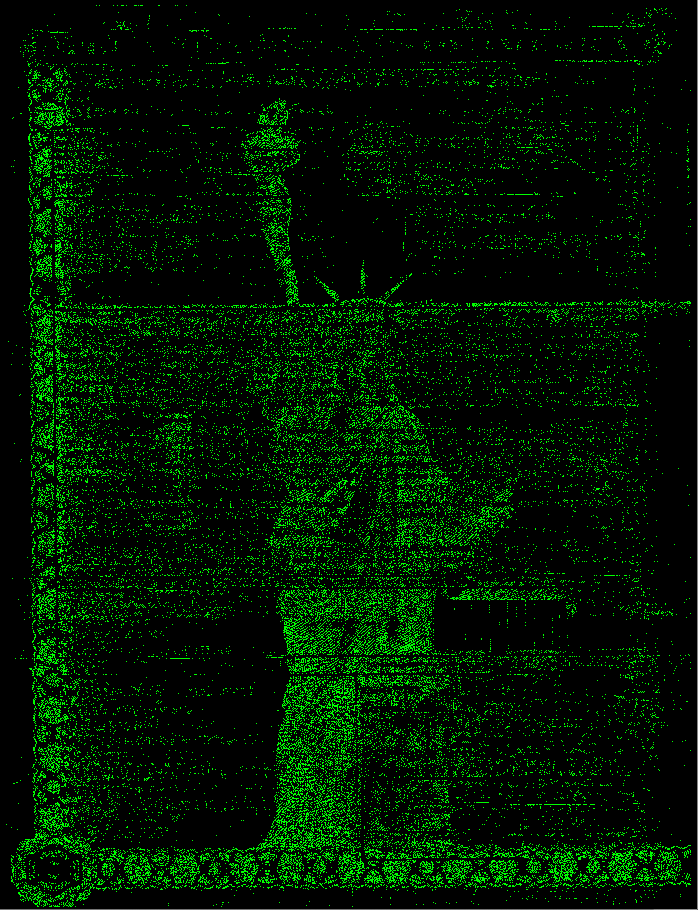

In [41]:
down = 239#238 ----- 239 
up = 248 # ---------248
array = img1
arrayNew = img1
w, h, j = array.shape
print(w, h)
for x in range(w-1):
    for y in range(h-1):
        """
        num = random.randint(0,3000)
        if num == 555:
            print (x, y)
            print(array[x, y])
        """
        try:
            singlearray = array[x, y]
            r = singlearray[0]
            g = singlearray[1]
            b = singlearray[2]
            """
            if r > thres and r < thres and g > thres and g < thres and b > thres and b < thres:
                arrayNew[x,y] = [255,255,255]
                print(\True\)
            """
            #print(array[x,y])
            #240, 245
            #230, 240

            if (r > down and r < up and g > down and g < up and b > down
                    and b < up):
                arrayNew[x, y] = [0, 255, 0]
            else:
                arrayNew[x, y] = [0, 0, 0]
        except:
            print(x, y)
img = Image.fromarray(arrayNew)
img

In [42]:
im1 = img.save("TestingImageWaterMark.jpg")

## Basic Removal of Real IMAGE

910 698
18422   106201   0   124623


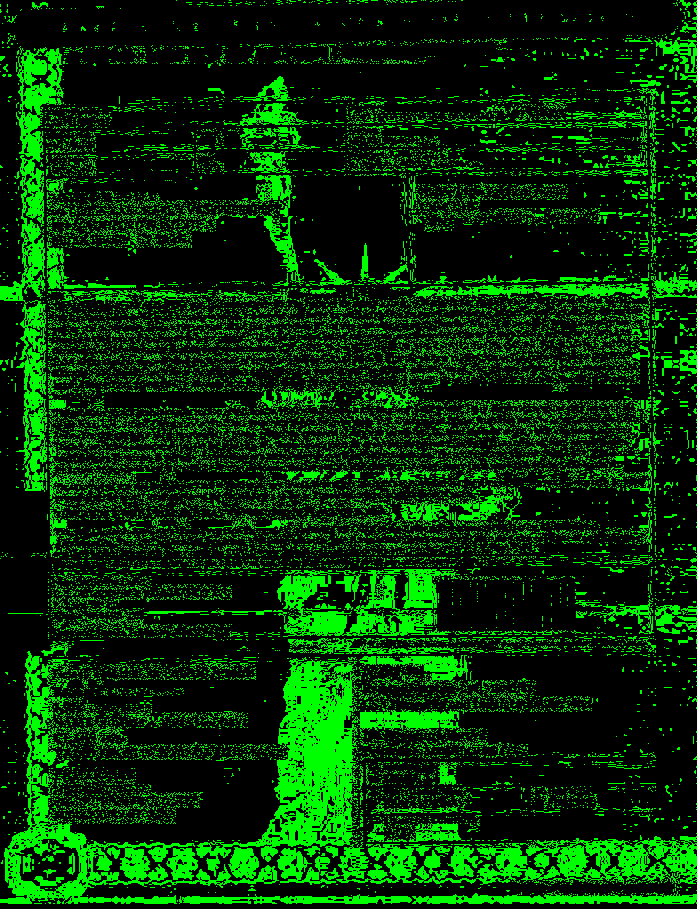

In [43]:
img2 = cv2.imread(COMPAREIMAGEFILEPNG)
img2 = cv2.resize(img2, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)
down2 = 239#238 ----- 239 
up2 = 248 # ---------248
array2 = img2
arrayNew2 = img2
w2, h2, j2 = array2.shape
print(w2, h2)
falsepixel = 0
correctpixel = 0
errorpixel = 0
totalpixel = 0
for x2 in range(w2-1):
    for y2 in range(h2-1):
        singlearray2 = array2[x2, y2]
        r2 = singlearray2[0]
        g2 = singlearray2[1]
        b2 = singlearray2[2]
        if (r2 > down2 and r2 < up2 and g2 > down2 and g2 < up2 and b2 > down2 and b2 < up2):
            arrayNew2[x2, y2] = [0, 255, 0]

            singlearray = array[x2,y2]
            r = singlearray[0]
            g = singlearray[1]
            b = singlearray[2]
            if (r == 0 and g == 0 and b == 0):
                falsepixel+=1

            elif (r == 0 and g == 255 and b == 0):
                correctpixel +=1
            else:
                errorpixel += 1
            totalpixel+=1
        else:
            arrayNew2[x2, y2] = [0, 0, 0]

img2final = Image.fromarray(arrayNew2)
print(correctpixel, " ", falsepixel, " ", errorpixel, " ", totalpixel)
img2final

In [44]:
im1 = img.save("REALImageWaterMark.jpg")

## FINAL COMPARE OF WATERMARK

In [45]:
down = 239#238 ----- 239 
up = 248 # ---------248
file2 = COMPAREIMAGEFILEPNG
file1 = MAINIMAGEFILEPNG
array = cv2.imread(file1)
array2 = cv2.imread(file2)
arrayNew = cv2.imread(file1)
arrayNew2 = cv2.imread(file2)
array = cv2.resize(array, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)
array2 = cv2.resize(array2, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)
arrayNew = cv2.resize(arrayNew, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)
arrayNew2 = cv2.resize(arrayNew2, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)
w,h,c = array.shape
w2,h2,c2 = array2.shape
NUMOFPIXELSHOULDTHEREBUTNOT = 0
NUMOFPIXELNOTBUTTHERE = 0
NUMOFCORRECTPIXEL = 0
totalCOUNT = 0
for x in range(w-1):
    for y in range(h-1):
        singlearray = array[x, y]
        r = singlearray[0]
        g = singlearray[1]
        b = singlearray[2]

        if (r > down and r < up and g > down and g < up and b > down and b < up):
            definitivVALUE = True
            totalCOUNT+=1
            arrayNew[x, y] = [0, 255, 0]
        else:
            definitivVALUE = False
            arrayNew[x, y] = [0, 0, 0]

        singlearray2 = array2[x, y]
        r2 = singlearray2[0]
        g2 = singlearray2[1]
        b2 = singlearray2[2]
        if (r2 > down and r2 < up and g2 > down and g2 < up and b2 > down and b2 < up):
            pixelDONTKNOW = True

        else:
            pixelDONTKNOW = False

        if(definitivVALUE and pixelDONTKNOW):
            #WHEN PIXEL SHOULD BE IN RANGE AND IS IN RANGE
            NUMOFCORRECTPIXEL+=1
        elif(definitivVALUE and not pixelDONTKNOW):
            #WHEN PIXEL SHOULD BE IN RANGE BUT ISNT
            NUMOFPIXELSHOULDTHEREBUTNOT+=1
        elif(not definitivVALUE and definitivVALUE):
            #WHEN PIXEL SHOULDN'T BE IN RANGE BUT IS
            NUMOFPIXELNOTBUTTHERE+=1      
img = Image.fromarray(arrayNew)
img
print(NUMOFCORRECTPIXEL, "   ", NUMOFPIXELSHOULDTHEREBUTNOT,"   ", NUMOFPIXELNOTBUTTHERE, "   ", totalCOUNT)

18422     36649     0     55071


## Compare Value Around Pixel

In [46]:
def valueAroundPixel(x, y, array, distance):
    countBlack = 0
    countGreen = 0
    singlearray = array[x, y]
    r_center = singlearray[0]
    g_center = singlearray[1]
    b_center = singlearray[2]

    uparray = array[x, y + distance]
    r_UP = uparray[0]
    g_UP = uparray[1]
    b_UP = uparray[2]
    if r_UP == 0 and g_UP == 0 and b_UP == 0:
        countBlack+=1
    else:
        countGreen+=1

    #_----------------------------------------------------------------------------------
    downarray = array[x, y - distance]
    r_DOWN = downarray[0]
    g_DOWN = downarray[1]
    b_DOWN = downarray[2]
    if r_DOWN == 0 and g_DOWN == 0 and b_DOWN == 0:
        countBlack+=1
    else:
        countGreen+=1
    #_----------------------------------------------------------------------------------
    rightarray = array[x + distance, y]
    r_right = rightarray[0]
    g_right = rightarray[1]
    b_right = rightarray[2]
    if r_right == 0 and g_right == 0 and b_right == 0:
        countBlack+=1
    else:
        countGreen+=1
    #_----------------------------------------------------------------------------------
    leftarray = array[x - distance, y]
    r_left = leftarray[0]
    g_left = leftarray[1]
    b_left = leftarray[2]
    if r_left == 0 and g_left == 0 and b_left == 0:
        countBlack+=1
    else:
        countGreen+=1
    #_----------------------------------------------------------------------------------
    UPRightarray = array[x + distance, y + distance]
    r_upright = UPRightarray[0]
    g_upright = UPRightarray[1]
    b_upright = UPRightarray[2]
    if r_upright == 0 and g_upright == 0 and b_upright == 0:
        countBlack+=1
    else:
        countGreen+=1
    #_----------------------------------------------------------------------------------
    UPLeftarray = array[x - distance, y + distance]
    r_upleft = UPLeftarray[0]
    g_upleft = UPLeftarray[1]
    b_upleft = UPLeftarray[2]
    if r_upleft == 0 and g_upleft == 0 and b_upleft == 0:
        countBlack+=1
    else:
        countGreen+=1
    #_----------------------------------------------------------------------------------
    DownRightarray = array[x + distance, y - distance]
    r_downright = DownRightarray[0]
    g_downright = DownRightarray[1]
    b_downright = DownRightarray[2]
    if r_downright == 0 and g_downright == 0 and b_downright == 0:
        countBlack+=1
    else:
        countGreen+=1
    #_----------------------------------------------------------------------------------
    DownLeftArray = array[x - distance, y - distance]
    r_downleft = DownLeftArray[0]
    g_downleft = DownLeftArray[1]
    b_downleft = DownLeftArray[2]
    if r_downleft == 0 and g_downleft == 0 and b_downleft == 0:
        countBlack+=1
    else:
        countGreen+=1
    #_----------------------------------------------------------------------------------


    return (countBlack, countGreen)

## Final Compare Around PIXEL WITH DISTANCE

In [47]:
file1 = 'REALImageWaterMark.jpg'

In [48]:
array = cv2.imread(file1)
x = len(array)

In [49]:
row = []
column = []
array = cv2.imread(file1)
x_length = len(array[0])
y_length = len(array)
print("Width: ",x_length,"Height: ", y_length)
for i in range(x_length):
    row.append(str(i))
for i in range(y_length):
    column.append(str(i))
df = pd.DataFrame(index=row, columns=column)

Width:  698 Height:  910


In [50]:
print(len(df))

698


In [51]:
for x in range(x_length-1):
    for y in range(y_length-1):
        try:
            df['{}'.format(y)]['{}'.format(x)] = array[y][x] #910, 698
        except:
            print(x,y)
df.to_excel(r'numpyARRAY.xlsx', sheet_name='test1')

In [52]:
file1 = 'REALImageWaterMark.jpg'
array = cv2.imread(file1)
arrayNew = cv2.imread(file1)
img = Image.open(file1)
w, h = img.size
rgb_im = img.convert('RGB')

In [53]:
count = 0
for i in array[0]:
    arraytest=[]
    a,b,c = i
    if a < 20 and b > 250 and c < 20:
        count+=1

In [54]:
%%time
file1 = 'REALImageWaterMark.jpg'
array = cv2.imread(file1)
arrayNew = cv2.imread(file1)
img = Image.open(file1)
w, h = img.size
rgb_im = img.convert('RGB')
NUMOFPIXELSHOULDTHEREBUTNOTAVERAGE = 0
NUMOFPIXELNOTBUTTHEREAVERAGE = 0
NUMOFCORRECTPIXELAVERAGE = 0
totalCOUNTAVERAGE = 0
definitivVALUEAVERAGE = False
print(w, h)
distance = 2
dis = distance
for thingthing in range(len(array[0])-distance):
    for thingthingYY in range(len(array)-distance):
        center_XXX = thingthing
        center_YYY = thingthingYY
        distance = dis
        partArrDis = [[0 for x in range(distance*2+1)] for y in range(distance*2+1)]
        center_XX = center_XXX
        center_YY = center_YYY
        for uu in range(distance*2+1):
            for rr in range(distance*2+1):
                a,b,c = array[uu+(thingthingYY-distance*2+1)][rr+(thingthing-distance*2+1)]
                theSingleArrayABC = [a,b,c]
                partArrDis[uu][rr] = theSingleArrayABC
        countGreen = 0
        countBlack = 0
        totalCount = 0
        theXofARRRAY = len(partArrDis)
        theYofARRRAY = len(partArrDis[0])
        for aa in range(theXofARRRAY):
            for bb in range(theYofARRRAY):
                singleARRAYwPART = partArrDis[aa][bb]
                rr, gg, bb = singleARRAYwPART
                if rr < 30 and gg < 30 and bb < 30:
                    countBlack += 1
                else:
                    countGreen += 1    
                totalCount+=1
        perceBlack = (countBlack/totalCount) * 100
        perceGreen = (countGreen/totalCount) * 100
        x = perceBlack+perceGreen
        IDK_X = center_XXX-distance*2+1
        IDK_Y = center_YYY-distance*2+1
        if (perceBlack > 40):
            arrayNew[IDK_Y][IDK_X]=[0,0,0]
            definitivVALUEAVERAGE = False
        else:
            arrayNew[IDK_Y][IDK_X] = [0,255,0]
            definitivVALUEAVERAGE = True
        singlearray2 = array2[thingthingYY, thingthing]
        r2 = singlearray2[0]
        g2 = singlearray2[1]
        b2 = singlearray2[2]
        if (r2 > down and r2 < up and g2 > down and g2 < up and b2 > down and b2 < up):
            pixelDONTKNOWAVERAGE = True
        else:
            pixelDONTKNOWAVERAGE = False
        if(definitivVALUEAVERAGE and pixelDONTKNOWAVERAGE):
            #WHEN PIXEL SHOULD BE IN RANGE AND IS IN RANGE
            NUMOFCORRECTPIXELAVERAGE+=1
        elif(definitivVALUEAVERAGE and not pixelDONTKNOWAVERAGE):
            #WHEN PIXEL SHOULD BE IN RANGE BUT ISNT
            NUMOFPIXELSHOULDTHEREBUTNOTAVERAGE+=1
        elif(not definitivVALUEAVERAGE and definitivVALUEAVERAGE):
            #WHEN PIXEL SHOULDN'T BE IN RANGE BUT IS
            NUMOFPIXELNOTBUTTHEREAVERAGE+=1     
        totalCOUNTAVERAGE+=1
print(NUMOFCORRECTPIXELAVERAGE, "   ", NUMOFPIXELSHOULDTHEREBUTNOTAVERAGE,"   ", NUMOFPIXELNOTBUTTHEREAVERAGE, "   ", totalCOUNTAVERAGE)          

698 910
28401     32608     0     631968
Wall time: 5min 58s


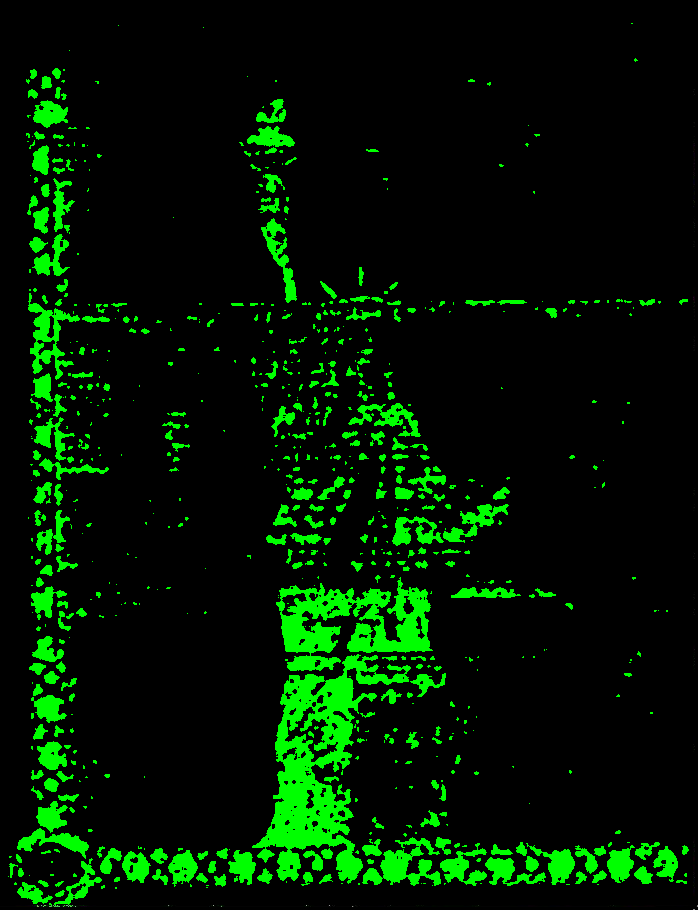

In [55]:
img = Image.fromarray(arrayNew)
im1 = img.save("GroupedPixeledIMAGE.jpg")
img

## Output

In [56]:
"""
print(NUMOFCORRECTPIXEL, \"   \", NUMOFPIXELSHOULDTHEREBUTNOT, \"   \", NUMOFPIXELNOTBUTTHERE, \" \", totalCOUNT)\n",
coorect = NUMOFCORRECTPIXEL/totalCOUNT
worng = NUMOFPIXELSHOULDTHEREBUTNOT/totalCOUNT
print(coorect, \" and \", worng)
if coorect < 0.075 or worng < 0.9:
    WATERMARKOUTPUTFINAL = False
else:
    WATERMARKOUTPUTFINAL = True
"""

'\nprint(NUMOFCORRECTPIXEL, "   ", NUMOFPIXELSHOULDTHEREBUTNOT, "   ", NUMOFPIXELNOTBUTTHERE, " ", totalCOUNT)\n",\ncoorect = NUMOFCORRECTPIXEL/totalCOUNT\nworng = NUMOFPIXELSHOULDTHEREBUTNOT/totalCOUNT\nprint(coorect, " and ", worng)\nif coorect < 0.075 or worng < 0.9:\n    WATERMARKOUTPUTFINAL = False\nelse:\n    WATERMARKOUTPUTFINAL = True\n'

In [57]:
print(correctpixel, " ", falsepixel, " ", errorpixel, " ", totalpixel)
print(NUMOFCORRECTPIXELAVERAGE, "   ", NUMOFPIXELSHOULDTHEREBUTNOTAVERAGE,"   ", NUMOFPIXELNOTBUTTHEREAVERAGE, "   ", totalCOUNTAVERAGE) 
print(NUMOFCORRECTPIXEL, "   ", NUMOFPIXELSHOULDTHEREBUTNOT,"   ", NUMOFPIXELNOTBUTTHERE, "   ", totalCOUNT)

18422   106201   0   124623
28401     32608     0     631968
18422     36649     0     55071


In [58]:
WATERMARKOUTPUTFINAL=False
WATERMARKOUTPUTave=False
WATERMARKOUTPUT2=False
WATERMARKOUTPUTFINAL=False
coorect = correctpixel/totalpixel*100
worng = falsepixel/totalpixel*100
error = errorpixel

aveCorrect = NUMOFCORRECTPIXELAVERAGE/totalCOUNTAVERAGE *100
aveWRONG = NUMOFPIXELSHOULDTHEREBUTNOTAVERAGE/totalCOUNTAVERAGE *100
aveERROR = NUMOFPIXELNOTBUTTHEREAVERAGE

correctPT2 = NUMOFCORRECTPIXEL/totalCOUNT *100
wrongPT2= NUMOFPIXELSHOULDTHEREBUTNOT/totalCOUNT*100
errorPT2 = NUMOFPIXELNOTBUTTHERE

if error > 700+950 or aveERROR > 700+950 or errorPT2 > 700+950:
    print("ERROR PLEASE CHECK")
if coorect < 10:
    WATERMARKOUTPUT1 = False
else:
    WATERMARKOUTPUT1 = True
if aveCorrect < 10:
    WATERMARKOUTPUTave = False
else:
    WATERMARKOUTPUTave = True
if correctPT2 < 10:
    WATERMARKOUTPUT2 = False
else:
    WATERMARKOUTPUT2 = True

if WATERMARKOUTPUT1 == True and WATERMARKOUTPUTave == True and WATERMARKOUTPUT2 == True: 
    WATERMARKOUTPUTFINAL = True
elif WATERMARKOUTPUT1 == True and WATERMARKOUTPUTave == True and WATERMARKOUTPUT2 == False: 
    WATERMARKOUTPUTFINAL = True
elif WATERMARKOUTPUT1 == False and WATERMARKOUTPUTave == True and WATERMARKOUTPUT2 == True: 
    WATERMARKOUTPUTFINAL = True
elif WATERMARKOUTPUT1 == True and WATERMARKOUTPUTave == False and WATERMARKOUTPUT2 == True: 
    WATERMARKOUTPUTFINAL = True

In [59]:
print(WATERMARKOUTPUT1)
print(WATERMARKOUTPUTave)
print(WATERMARKOUTPUT2)

True
False
True


In [60]:
WATERMARKOUTPUTFINAL

True

# Compare IMAGES

## Image Size

In [61]:
print("Shape for image 1:")
print(x11, " ", y11, " ", z11)
print("Shape for image 2:")
print(x2, " ", y2, " ", z2)

Shape for image 1:
1645   1273   3
Shape for image 2:
908   696   3


# SSIM DIFFERENCE

In [62]:
imageA = img1
imageB = img2


grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

print(imageA.shape)
print(imageB.shape)
bigH, bigW,other = imageA.shape

(910, 698, 3)
(910, 698, 3)


In [63]:
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype('uint8')
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

SSIM: 0.1232234185450378


In [64]:
areaDIFFERENCE = 0
# loop over the contours
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
    areaDIFFERENCE += (w*h)

perdiff =  ((areaDIFFERENCE/(bigW*bigH))*100)
print("The percent different is ", ((areaDIFFERENCE/(bigW*bigH))*100))

The percent different is  102.0524890582197


## Output

In [65]:
print("The percent different is ", ((areaDIFFERENCE/(bigW*bigH))*100))

The percent different is  102.0524890582197


In [66]:
#cv2.imshow(\"Original\", imageA)
#cv2.imshow(\"Modified\", imageB)
#cv2.imshow(\"Diff\", diff)
#cv2.imshow(\"Thresh\", thresh)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
# OVERLAY THE IMAGE

# Compare Images

## Display All main points of connectors

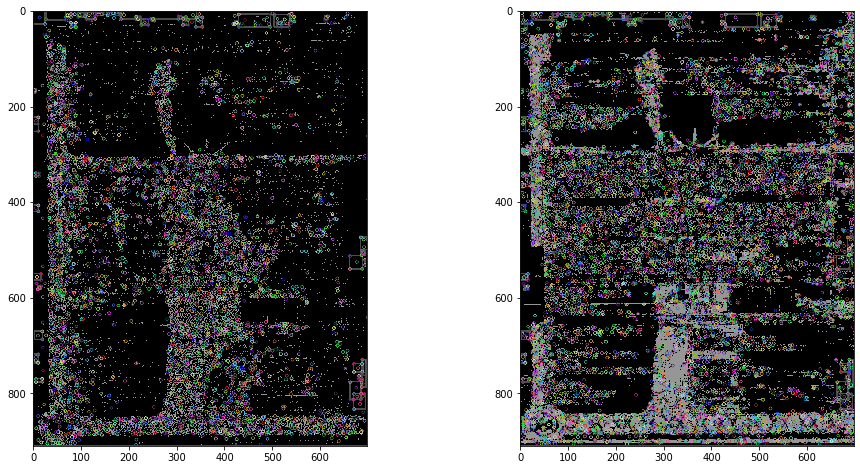

In [67]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
NUMBER_OF_KEYPOINST_IMG1 = len(keypoints_1)
NUMBER_OF_KEYPOINST_IMG2 = len(keypoints_2)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
img_2 = cv2.drawKeypoints(gray2,keypoints_2,img2)


figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1)
ax[1].imshow(img2)

## Display Both Images

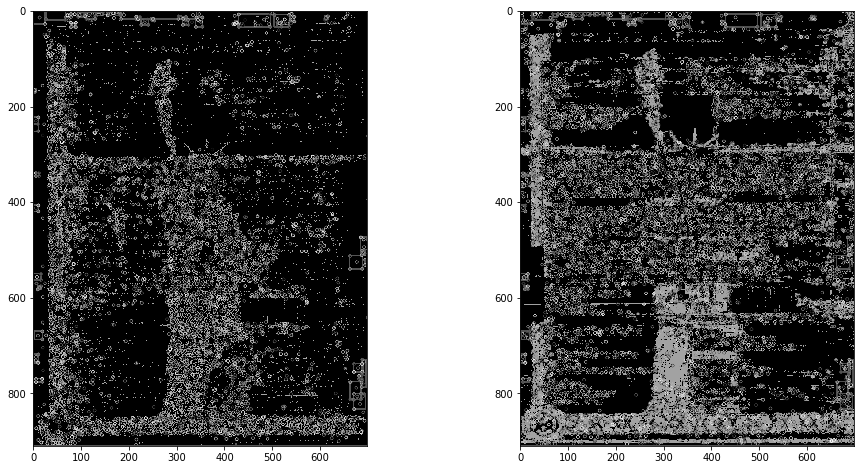

In [68]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

## All lines compare

7549 11643


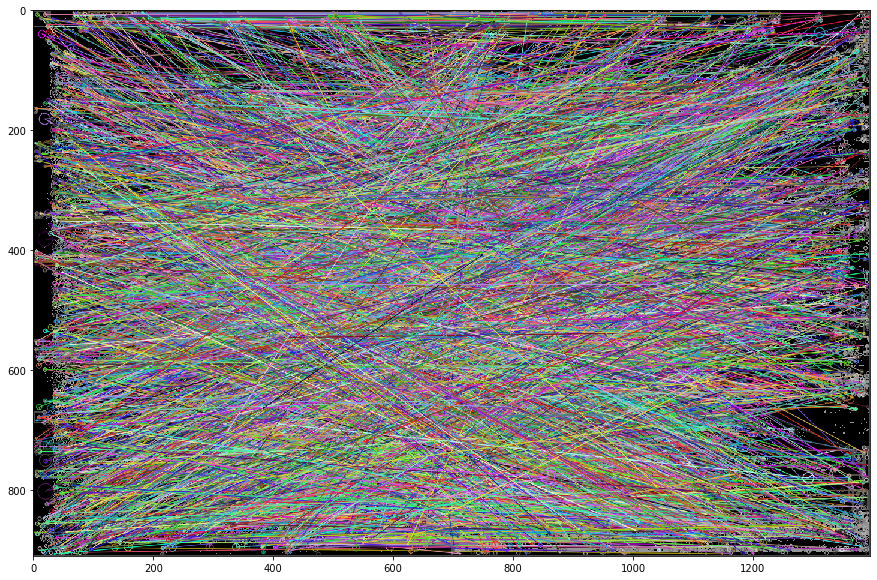

In [69]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
print(len(keypoints_1), len(keypoints_2))

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
#print(matches)
matches = sorted(matches, key = lambda x:x.distance)
totalMATCHES = (len(matches))
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches, img2, flags=6)#flags orginally 2 and must be even
im = Image.fromarray(img3)
im.save('difference.png')
fig = plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.show()


## Single line compare

[[<DMatch 000001E02E840CB0>, <DMatch 000001E02E840450>]]


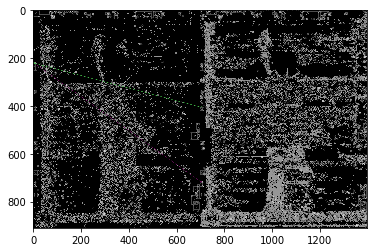

(<matplotlib.image.AxesImage at 0x1e0296e3408>, None)

In [70]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
#print(des1, des2)
matches = bf.knnMatch(des1,des2, k=2)

"""
DMatch.distance - Distance between descriptors. The lower, the better it is.
DMatch.trainIdx - Index of the descriptor in train descriptors
DMatch.queryIdx - Index of the descriptor in query descriptors
DMatch.imgIdx - Index of the train image.
"""
"""
# Apply ratio test
good = []
#print(matches)
for m,n in matches:
    print(m.distance)
    print("             ", n.distance)
    if m.distance < 0.75*n.distance:
        good.append([m])
"""
test1 = matches[12:13]
print(test1)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches[12:13],None,flags =2)



plt.imshow(img3),plt.show()

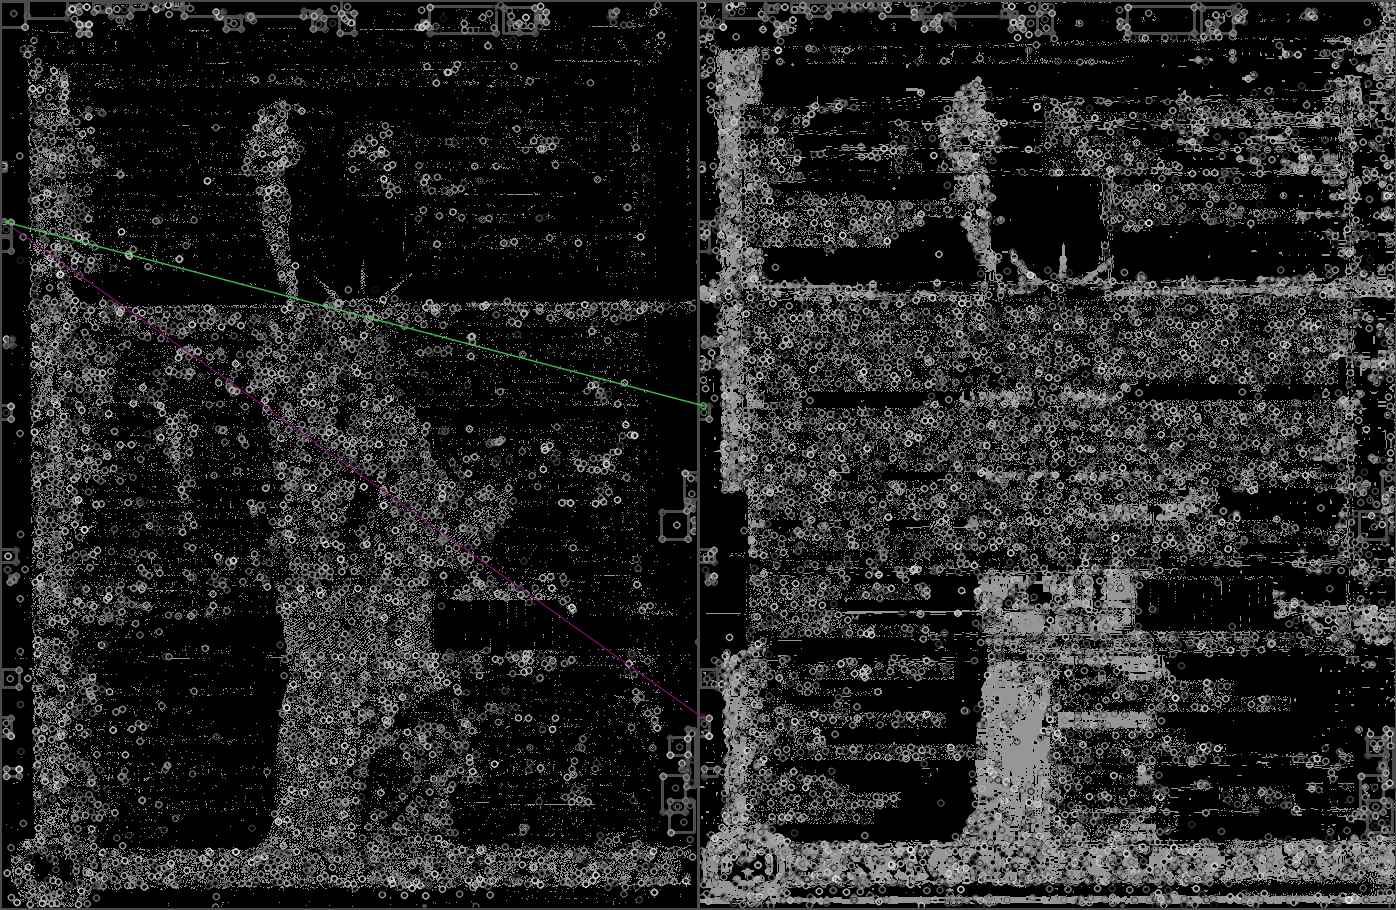

In [71]:
im = Image.fromarray(img3)
im

In [72]:
cv2.drawMatchesKnn.__doc__

'drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches1to2, outImg[, matchColor[, singlePointColor[, matchesMask[, flags]]]]) -> outImg\n.   @overload'

## Ratio threshold

In [73]:
if img1 is None or img2 is None:
    print('Could not open or find the images!')
    exit(0)
#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors


minHessian = 400
detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
#-- Step 2: Matching descriptor vectors with a FLANN based matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)
print((len(good_matches)))
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#-- Show detected matches
#cv2.imshow('Good Matches', img_matches)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

26


array([[[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [150, 150, 150],
        [  0,   0,   0],
        [ 76,  76,  76]],

       ...,

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 76,  76,  76]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]]

In [74]:
rationVALarray = []
for i in range(0,(int((1.0/0.05)+(1)))):
    rationVALarray.append(format((i*0.05),'.2f'))
lenTOTAL = []
for i in rationVALarray:
    good_matches=[]
    ratio_thresh = i
    for m,n in knn_matches:
        if m.distance < float(ratio_thresh) * n.distance:
            good_matches.append(m)
    #print(i, " ", len(good_matches))
    lenTOTAL.append(len(good_matches))

In [75]:
IMAGE1NAME = MAINIMAGEFILEPNG
img1 = cv2.imread(IMAGE1NAME)
img1 = cv2.resize(img1, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)
IMAGE2NAME = COMPAREIMAGEFILEPNG
img2 = cv2.imread(IMAGE2NAME) 
img2 = cv2.resize(img2, dsize=(698, 910), interpolation=cv2.INTER_CUBIC)


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

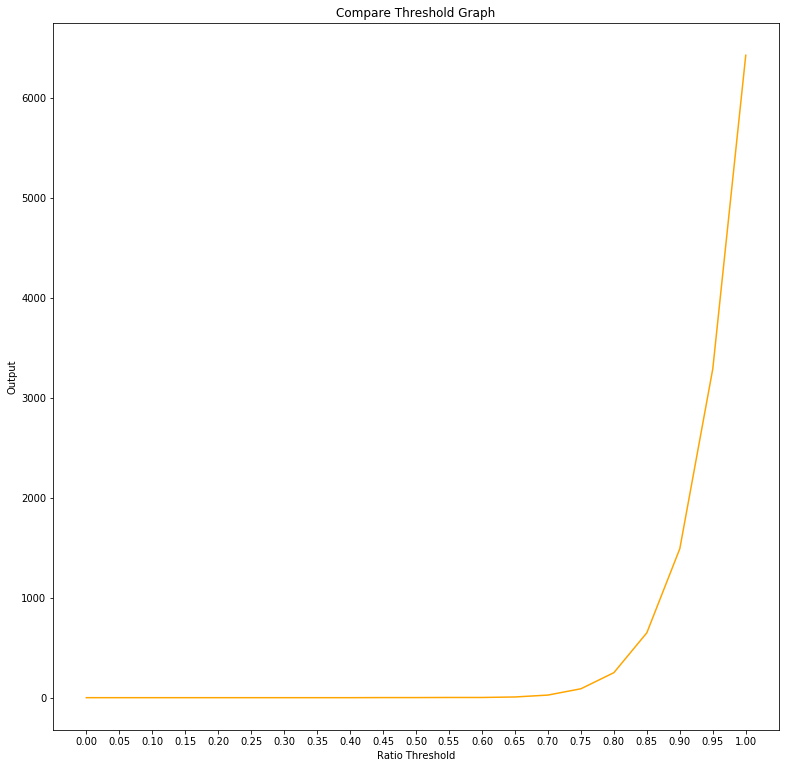

In [76]:
fig = plt.figure(figsize=(13,13))
plt.plot(rationVALarray, lenTOTAL, color='orange')
plt.xlabel('Ratio Threshold')
plt.ylabel('Output')
plt.title('Compare Threshold Graph')
plt.show()

In [77]:
rationVALarray = []
for i in range(0,(int((1.0/0.05)+(1)))):
    rationVALarray.append(format((i*0.05),'.2f'))
aList = []
for i in range(10):
    minHessian = 400
    detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
    keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
    keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
    #-- Step 2: Matching descriptor vectors with a FLANN based matcher
    # Since SURF is a floating-point descriptor NORM_L2 is used
    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
    knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)
    #-- Filter matches using the Lowe's ratio test 
    lenTOTAL = []
    for i in rationVALarray:
        good_matches=[]
        ratio_thresh = i
        for m,n in knn_matches:
            if m.distance < float(ratio_thresh) * n.distance:
                good_matches.append(m)
        #print(i, " ", len(good_matches))
        lenTOTAL.append(len(good_matches))
    #print(lenTOTAL)
    aList.append(lenTOTAL)

[0, 0, 0, 1, 8, 26, 63, 106, 152, 228, 350, 474, 646, 859, 1109, 1413, 1877, 2516, 3530, 5205, 7748]
[0, 0, 0, 1, 9, 24, 61, 100, 152, 232, 352, 477, 659, 849, 1095, 1419, 1854, 2506, 3506, 5121, 7748]
[0, 0, 0, 1, 9, 25, 61, 101, 159, 234, 367, 489, 667, 859, 1086, 1398, 1867, 2517, 3527, 5161, 7748]
[0, 0, 0, 1, 8, 24, 59, 107, 156, 227, 349, 477, 653, 860, 1096, 1421, 1871, 2542, 3543, 5206, 7748]
[0, 0, 0, 1, 9, 25, 62, 104, 158, 227, 352, 480, 663, 866, 1096, 1417, 1869, 2518, 3524, 5163, 7748]
[0, 0, 0, 1, 7, 26, 62, 108, 158, 225, 350, 480, 653, 863, 1096, 1395, 1844, 2505, 3484, 5179, 7748]
[0, 0, 0, 1, 8, 25, 62, 104, 152, 227, 357, 492, 652, 864, 1091, 1413, 1862, 2496, 3544, 5186, 7748]
[0, 0, 0, 1, 8, 24, 57, 102, 157, 233, 346, 481, 658, 857, 1095, 1423, 1855, 2502, 3504, 5186, 7748]
[0, 0, 0, 1, 7, 28, 65, 109, 159, 231, 351, 481, 665, 852, 1087, 1413, 1875, 2525, 3530, 5138, 7748]
[0, 0, 0, 1, 9, 27, 59, 103, 154, 235, 358, 482, 663, 859, 1110, 1424, 1862, 2494, 3479, 51

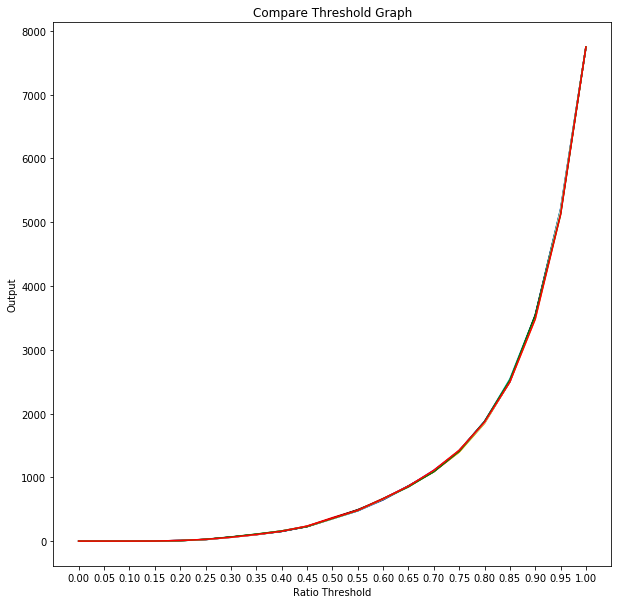

In [78]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
colors = ['b', 'g', 'r', 'c','m' ,'y', 'k','w','g', 'r']
for i in range(len(aList)):
    print(aList[i])
    plt.plot(rationVALarray, aList[i], color=colors[i])
plt.xlabel('Ratio Threshold')
plt.ylabel('Output')
plt.title('Compare Threshold Graph')
plt.show()

In [79]:
#print(aList[i])
#count = i+1
#for j in range(len(aList[i])):
    #print(aList[i][count])
#print(aList[i][i])
totalCompare =[]
for k in range(len(aList[0])):
    singlecompareArray=[]
    for i in range(len(aList)):
        singlecompareArray.append(aList[i][k])
    totalCompare.append(singlecompareArray)

In [80]:
dataset= aList[0]
mean= np.mean(dataset)
median = np.median(dataset)
mode= stats.mode(dataset)

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)

Mean:  1252.904761904762
Median:  350.0
Mode:  ModeResult(mode=array([0]), count=array([3]))


In [81]:
perfectArray = []
for i in range(len(totalCompare)):
    perfectArray.append(statistics.median(totalCompare[i]))

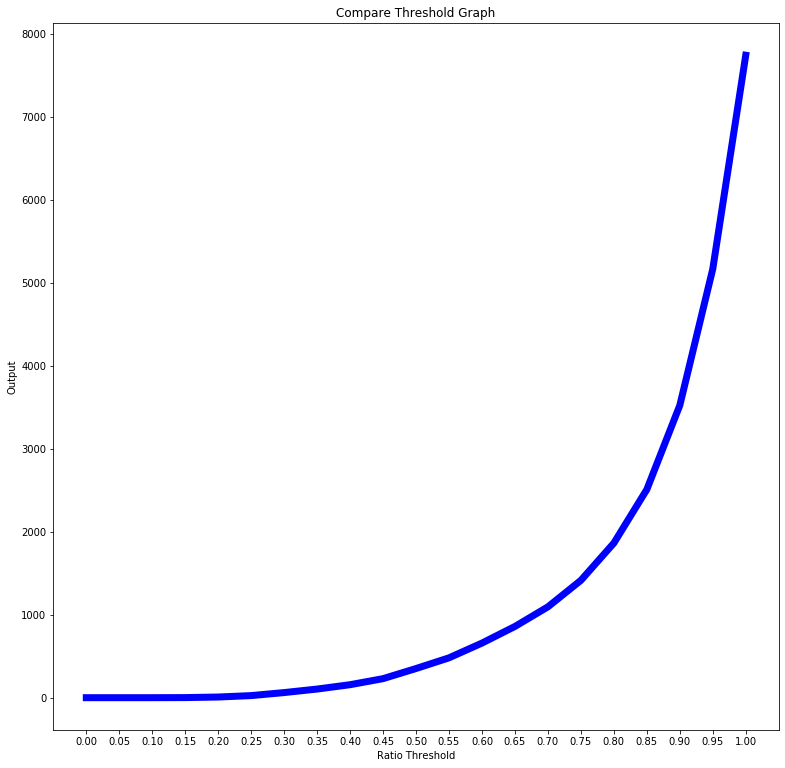

In [82]:
fig = plt.figure(figsize=(13,13))
plt.plot(rationVALarray, perfectArray, color='blue',linewidth=7.0)
plt.xlabel('Ratio Threshold')
plt.ylabel('Output')
plt.title('Compare Threshold Graph')
plt.show()

In [83]:
"""

BASED ON THIS GRAPH YOU CAN SEE THAT THE AVERAGE VALUE THAT IS BEST FOR THE GRAPH WILL BE 0.64

    /-------\         --------      |       | 
    |       |         |             |       |
    |       |         |             |       |
    |       |         |-----\        \------/
    |       |         |     |               |
    |       |   /\    |     |               |
    \-------/   \/    |-----/               | 
"""

'\n\nBASED ON THIS GRAPH YOU CAN SEE THAT THE AVERAGE VALUE THAT IS BEST FOR THE GRAPH WILL BE 0.64\n\n    /-------\\         --------      |       | \n    |       |         |             |       |\n    |       |         |             |       |\n    |       |         |-----\\        \\------/\n    |       |         |     |               |\n    |       |   /\\    |     |               |\n    \\-------/   \\/    |-----/               | \n'

## FINAL RUN

825


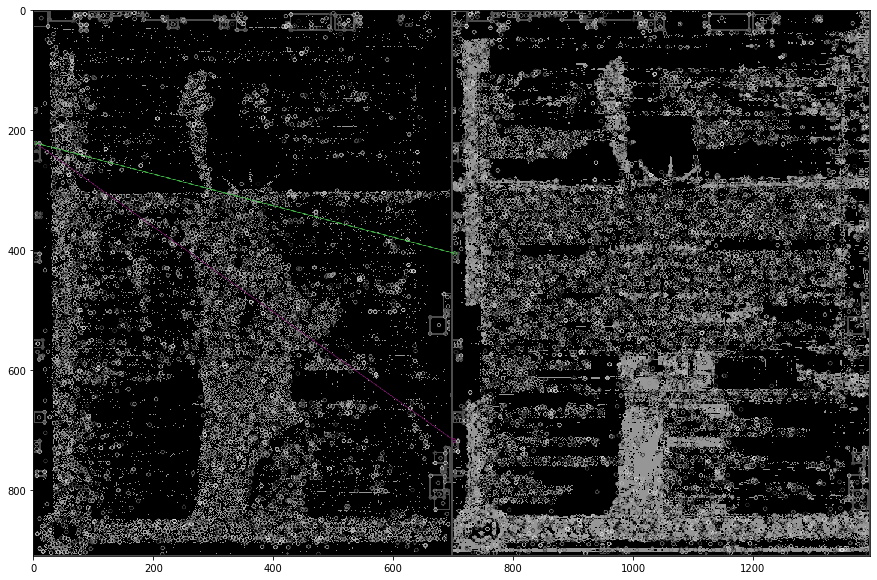

In [84]:
if img1 is None or img2 is None:
    print('Could not open or find the images!')
    exit(0)

minHessian = 400
detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
#-- Step 2: Matching descriptor vectors with a FLANN based matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.64
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)
print((len(good_matches)))
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#-- Show detected matches
im = Image.fromarray(img3)
im.save('FINALWORKINGIMAGEPT1.png')
fig = plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.show()
NUMEBROFMATCHESRATIOTEST = len(good_matches)

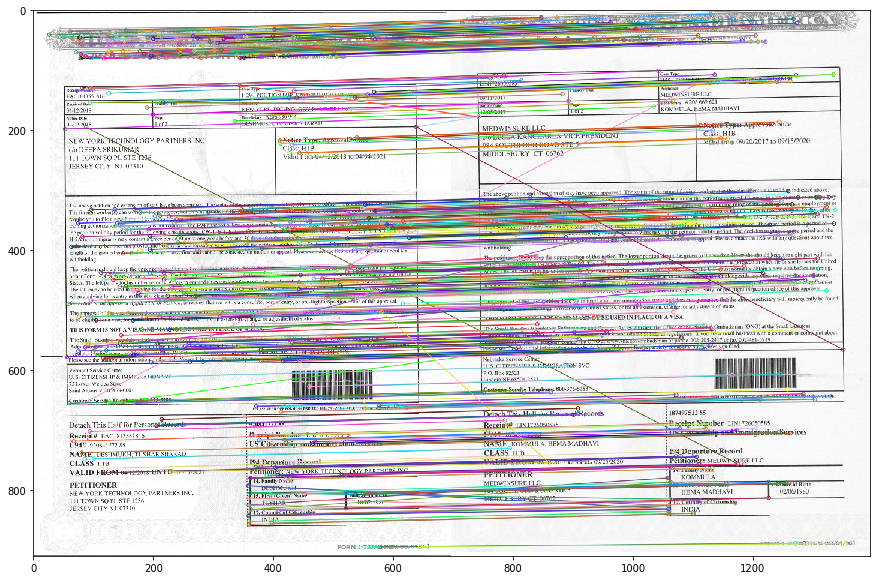

In [85]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
#print(des1, des2)
matches = bf.knnMatch(des1,des2, k=2)


#85
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 87:
        good.append([m])
    if n.distance < 87:
        good.append([n])
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags =2)

im = Image.fromarray(img3)
im.save('FINALWORKINGIMAGEPT2.png')
fig = plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.show()
NUMEBROFMATCHESDISTANCETEST = len(good)

##  Output

In [86]:
print("**************************")
print(IMAGE1NAME)
print(IMAGE2NAME)
print("**************************")
print("IMAGE 1 is FAKE")
print("IMAGE 2 is REAL")
print("**************************")
print("Shape of image 1 is ")
print(x11, " ", y11, " ", z11)
print("Shape of image 2 is")
print(x2, " ", y2, " ", z2)
print("**************************")
print("The SSIM score is ")
if score > 0.25:
    SSIMFINALSCORE = True
else:
    SSIMFINALSCORE = False
print(score)
print("**************************")
print("The Percent Difference is")
print(perdiff)
if perdiff > 0.8:
    PERCENTDIFFERNCE = True
else:
    PERCENTDIFFERNCE = False
print("**************************")
print("The number of key points in image 1 is")
print(NUMBER_OF_KEYPOINST_IMG1)
print("The number of key points in image 2 is")
print(NUMBER_OF_KEYPOINST_IMG2)
print("**************************")
print("The total number of matches is")
print(totalMATCHES)
print("**************************")
print("Number of matches for the distance test is", NUMEBROFMATCHESDISTANCETEST)
print("Number of matches for the ratio test is", NUMEBROFMATCHESRATIOTEST)

**************************
/Users/kunal/Documents/VdartWorking/SampleCopies/GenuineCopies/H1B - Tushar Sharad Part 1PNG.PNG
/Users/kunal/Documents/VdartWorking/realFake/Document.jpg
**************************
IMAGE 1 is FAKE
IMAGE 2 is REAL
**************************
Shape of image 1 is 
1645   1273   3
Shape of image 2 is
908   696   3
**************************
The SSIM score is 
0.1232234185450378
**************************
The Percent Difference is
102.0524890582197
**************************
The number of key points in image 1 is
4398
The number of key points in image 2 is
8293
**************************
The total number of matches is
5152
**************************
Number of matches for the distance test is 529
Number of matches for the ratio test is 825


# FINAL OUTPUT

In [87]:
print("BASIC INFO:")
print(IMAGE1NAME)
print(IMAGE2NAME)
print("************************************************************************")
print("Shape of image 1 is ")
print(x11, " ", y11, " ", z11)
print("Shape of image 2 is")
print(x2, " ", y2, " ", z2)
print("************************************************************************")

BASIC INFO:
/Users/kunal/Documents/VdartWorking/SampleCopies/GenuineCopies/H1B - Tushar Sharad Part 1PNG.PNG
/Users/kunal/Documents/VdartWorking/realFake/Document.jpg
************************************************************************
Shape of image 1 is 
1645   1273   3
Shape of image 2 is
908   696   3
************************************************************************


In [88]:
#display(Markdown('**some markdown** '))
print("Barcode Output:")
print(BARCODEISCORRECT)
print("************************************************************************")
print("DATE OUTPUT:")
print(DATEWORKING, " because ", WHYDATEISWORKING)
print("************************************************************************")
print("TITLE OUTPUT:")
print(TITLEIMAGECOMPARE)
print("Difference in BLUE       Difference in GREEN     Difference in RED")
print(PERCENT_BLUE_DIFFERENCE_TITLE, "\t\t\t", PERCENT_GREEN_DIFFERENCE_TITLE, "\t\t\t", PERCENT_RED_DIFFERENCE_TITLE)
print("************************************************************************")
print("TEXT OUTPUT:")
print(SIMILARTYBETWEENTEXTINDOCUMENT)
print("************************************************************************")
print("WATER MARK OUTPUT:")
print(WATERMARKOUTPUTFINAL)
print("************************************************************************")
print("SSIM SCORE OUTPUT")
print(SSIMFINALSCORE)
print("************************************************************************")
print("Percent Difference OUTPUT")
print(PERCENTDIFFERNCE)
print("************************************************************************")

Barcode Output:
False
************************************************************************
DATE OUTPUT:
True  because  Year Works
************************************************************************
TITLE OUTPUT:
False
Difference in BLUE       Difference in GREEN     Difference in RED
6.2625 			 6.2125 			 6.3343750000000005
************************************************************************
TEXT OUTPUT:
False
************************************************************************
WATER MARK OUTPUT:
True
************************************************************************
SSIM SCORE OUTPUT
False
************************************************************************
Percent Difference OUTPUT
True
************************************************************************


In [96]:
countREAL = 0
countFAKE = 0
if BARCODEISCORRECT:
    countREAL += 1
else:
    countFAKE += 1
#------------------------
if DATEWORKING:
    countREAL += 1
else:
    countFAKE += 1
#------------------------
if TITLEIMAGECOMPARE:
    countREAL += 1
else:
    countFAKE += 1
#------------------------
if SIMILARTYBETWEENTEXTINDOCUMENT:
    countREAL += 1
else:
    countFAKE += 1
#------------------------
if WATERMARKOUTPUTFINAL:
    countREAL += 1
else:
    countFAKE += 1
#------------------------
if SSIMFINALSCORE:
    countREAL += 1
else:
    countFAKE += 1
#------------------------
if PERCENTDIFFERNCE:
    countREAL += 1
else:
    countFAKE += 1
print(countREAL, " ", countFAKE)

4   3


In [97]:
documentanswer = False
if countREAL >= 4:
    documentanswer = True

In [98]:
if documentanswer:
    display(Markdown('**Document is REAL**'))
else:
    display(Markdown('**Document is FAKE**'))

**Document is REAL**